In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [42]:
data_seoul = pd.read_csv('Airbnb Listings in Seoul (May 2016).csv')

In [43]:
drop_data = ["Unnamed: 0",'room_id','host_id','borough','neighborhood',
 'reviews','collected']
data_seoul.drop(drop_data,axis = 1,inplace = True)

In [44]:
data_seoul.dropna(axis = 0, inplace = True)
data_seoul.reset_index(drop = True,inplace = True)

In [45]:
from sklearn.preprocessing import OneHotEncoder

roomtype = data_seoul[['room_type']]
encoder = OneHotEncoder()
roomtype = encoder.fit_transform(roomtype)
roomtype.toarray()

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [46]:
roomtype = pd.DataFrame(columns = encoder.categories_[0],data = roomtype.toarray())

In [47]:
value = data_seoul[['price']]
data_seoul.drop(['price','room_type'],axis = 1 , inplace = True)

In [48]:
data = pd.concat([data_seoul,roomtype,value], axis = 1)

price Max:  1657


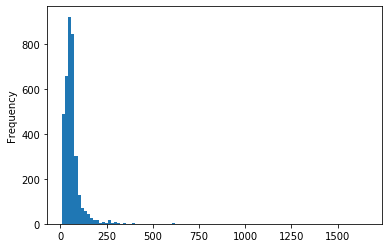

In [49]:
data['price'].plot(kind = 'hist',bins =100)
print('price Max: ',data['price'].max())

In [50]:
data['group'] = pd.cut(x= data['price'],
                      bins = [0,50,100,150,200,500,1657],
                      labels = ['group_1','group_2','group_3','group_4','group_5','group_6'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3629 entries, 0 to 3628
Data columns (total 12 columns):
overall_satisfaction    3629 non-null float64
accommodates            3629 non-null int64
bedrooms                3629 non-null float64
bathrooms               3629 non-null float64
minstay                 3629 non-null float64
latitude                3629 non-null float64
longitude               3629 non-null float64
Entire home/apt         3629 non-null float64
Private room            3629 non-null float64
Shared room             3629 non-null float64
price                   3629 non-null int64
group                   3629 non-null category
dtypes: category(1), float64(9), int64(2)
memory usage: 315.7 KB


In [51]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size= 0.2, random_state=42)
for train_index, test_index in split.split(data,data['group']):
    train = data.loc[train_index]
    test = data.loc[test_index]

In [52]:
for train_val_index, valid_index in split.split(train,train['group']):
    train_val = data.loc[train_val_index]
    valid = data.loc[valid_index]

In [53]:
train.reset_index(drop = True, inplace = True)
test.reset_index(drop = True, inplace = True)

In [54]:
train_val.reset_index(drop = True, inplace = True)
valid.reset_index(drop = True, inplace = True)

In [55]:
train.drop('group',axis = 1,inplace = True)
test.drop('group',axis = 1,inplace = True)
train_val.drop('group',axis = 1,inplace = True)
valid.drop('group',axis = 1,inplace = True)

In [56]:
train_y = train[['price']]
train_X = train.drop(['price','overall_satisfaction'], axis = 1)

test_y = test[['price']]
test_X = test.drop(['price','overall_satisfaction'], axis = 1)

train_val_y = train_val[['price']]
train_val_X = train_val.drop(['price','overall_satisfaction'], axis = 1)

valid_y = valid[['price']]
valid_X = valid.drop(['price','overall_satisfaction'], axis = 1)

In [57]:
train_X.to_csv('Su_train_X.csv',header = True, index = False)
train_y.to_csv('Su_train_y.csv',header = True, index = False)
test_X.to_csv('Su_test_X.csv',header = True, index = False)
test_y.to_csv('Su_test_y.csv',header = True, index = False)

train_val_X.to_csv('Su_train_val_X.csv',header = True, index = False)
train_val_y.to_csv('Su_train_val_y.csv',header = True, index = False)
valid_X.to_csv('Su_valid_X.csv',header = True, index = False)
valid_y.to_csv('Su_valid_y.csv',header = True, index = False)

In [58]:
valid_X

,accommodates,bedrooms,bathrooms,minstay,latitude,longitude,Entire home/apt,Private room,Shared room
0,2,0.0,1.0,1.0,37.480466,126.950146,1.0,0.0,0.0
1,4,0.0,1.0,2.0,37.555266,126.971207,1.0,0.0,0.0
2,6,1.0,1.0,2.0,37.567219,126.983203,1.0,0.0,0.0
3,3,1.0,1.0,2.0,37.533109,126.899626,1.0,0.0,0.0
4,2,1.0,1.0,1.0,37.494045,127.118909,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
576,3,0.0,1.0,1.0,37.562296,126.986432,1.0,0.0,0.0
577,1,1.0,1.0,3.0,37.575299,126.934740,0.0,1.0,0.0
578,3,1.0,1.0,2.0,37.566071,127.006651,1.0,0.0,0.0
579,1,1.0,1.0,2.0,37.554330,126.929594,0.0,0.0,1.0


In [59]:
train_X

,accommodates,bedrooms,bathrooms,minstay,latitude,longitude,Entire home/apt,Private room,Shared room
0,6,1.0,1.0,1.0,37.555493,126.969682,1.0,0.0,0.0
1,3,1.0,1.0,1.0,37.573924,126.973406,1.0,0.0,0.0
2,4,1.0,1.0,2.0,37.509411,127.058973,1.0,0.0,0.0
3,6,1.0,1.0,2.0,37.576309,127.026761,0.0,1.0,0.0
4,6,3.0,1.0,2.0,37.561603,126.920314,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2898,3,0.0,1.0,1.0,37.551192,126.969592,1.0,0.0,0.0
2899,6,2.0,1.0,1.0,37.554093,126.971305,1.0,0.0,0.0
2900,5,1.0,1.0,1.0,37.544037,126.985796,1.0,0.0,0.0
2901,3,0.0,1.0,2.0,37.566532,127.022874,1.0,0.0,0.0


In [60]:
train_val_X

,accommodates,bedrooms,bathrooms,minstay,latitude,longitude,Entire home/apt,Private room,Shared room
0,3,1.0,1.0,3.0,37.541423,127.068947,1.0,0.0,0.0
1,5,1.0,1.0,1.0,37.600715,126.918223,1.0,0.0,0.0
2,1,1.0,1.0,1.0,37.556848,126.929077,0.0,1.0,0.0
3,3,0.0,1.0,1.0,37.560668,126.987539,1.0,0.0,0.0
4,5,0.0,1.0,2.0,37.567169,126.977303,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2317,3,1.0,1.0,2.0,37.549131,126.914335,1.0,0.0,0.0
2318,5,1.0,1.0,2.0,37.574602,126.970735,1.0,0.0,0.0
2319,6,3.0,2.0,1.0,37.534515,127.000540,1.0,0.0,0.0
2320,2,1.0,1.0,2.0,37.560716,126.919584,1.0,0.0,0.0


In [61]:
test_X

,accommodates,bedrooms,bathrooms,minstay,latitude,longitude,Entire home/apt,Private room,Shared room
0,3,0.0,2.0,3.0,37.505481,127.056603,1.0,0.0,0.0
1,5,1.0,1.0,2.0,37.558598,126.946298,0.0,1.0,0.0
2,4,1.0,2.0,1.0,37.507958,127.082566,0.0,0.0,1.0
3,10,0.0,1.0,1.0,37.555432,126.971465,1.0,0.0,0.0
4,1,1.0,1.0,1.0,37.559908,126.964755,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
721,3,1.0,1.0,1.0,37.513042,126.926221,1.0,0.0,0.0
722,4,1.0,1.0,1.0,37.537873,126.969752,1.0,0.0,0.0
723,5,1.0,1.0,2.0,37.550988,126.921746,1.0,0.0,0.0
724,4,1.0,1.0,1.0,37.498082,127.041009,1.0,0.0,0.0
